In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file from dataset
data= pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.shape

(891, 12)

In [4]:
#Checking the type of data
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualizing missing data

<AxesSubplot:>

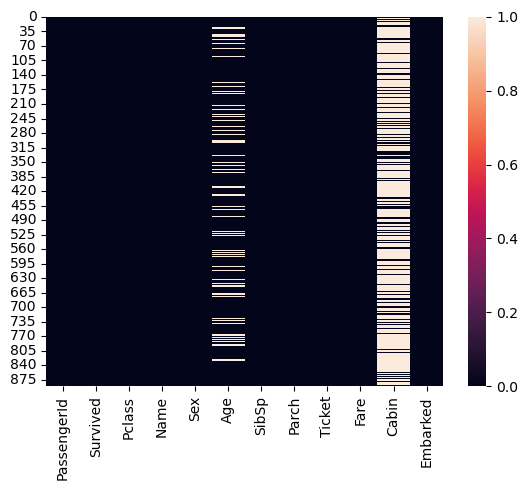

In [7]:
sns.heatmap(data.isnull())


The null values present in the Columns Age, Cabin and Embarked is shown by the white lines. The white lines represents the missing data.

In [8]:
# Checking the uniqueness of dataset
data['Survived'].unique()

array([0, 1], dtype=int64)

 As we can see in the label there are two unique values that is 0 = No and 1 = Yes and this target variable has integer datatype.

In [9]:
# Checking count of number of survivors 
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The classes 0 and 1 represents the passengers who did not survived and who survived. It can be seen that the data is not balanced

# Describing dataset

In [10]:
# Statistical summary of dataset
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the dataset. 

1)Age column has count 714 which shows that there are some missing values in the dataset.The min age of a passenger in 0.4 i.e 4 months and the max age of the passenger is 80yrs where as the mean age is 29

2)The max fare paid is 512 dollars and min fare paid is 0 dollars.The describe method only displays the continuous data information. Thus, it can be seen that some columns like Name, Sex, Ticket, Cabin and Embarked are not included as they have object datatype.

3)In conclusion, the datasets has more outliers as well as skewness in the data.

# Data Visualization

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

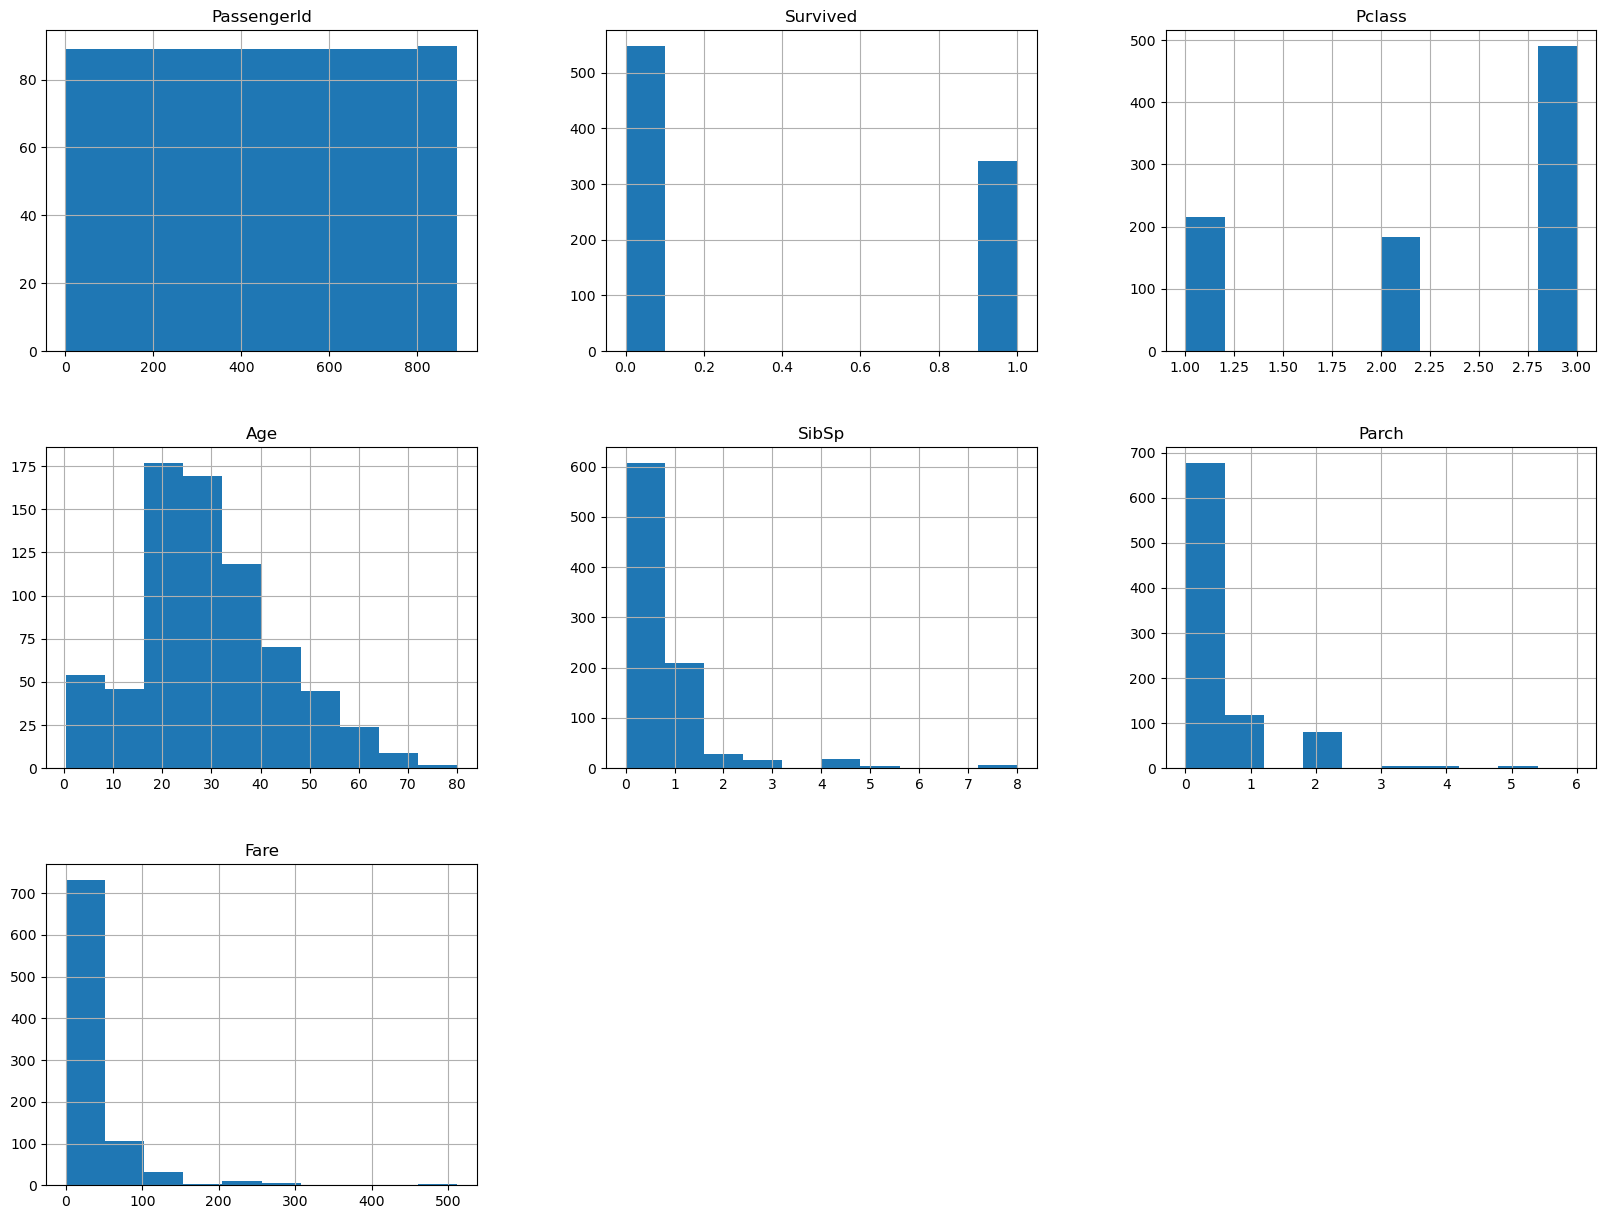

In [11]:
data.hist(figsize=(20,15))  #histographic representation of coloumns

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

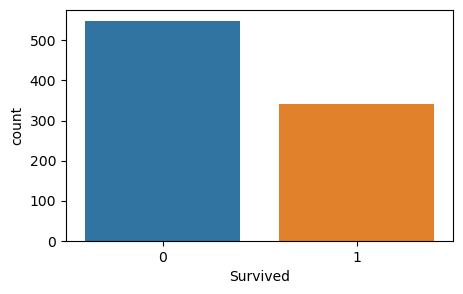

In [12]:
#Visualize the count of survivors
plt.figure(figsize=[5,3])
print(data["Survived"].value_counts())
sns.countplot(data["Survived"])


From the above graph passengers survived in the disaster are less as compared. Also it can be seen that the data is imbalanced. Since it is the target variable the class imbalancing issue can be solved by oversampling and downsampling before building the ML models

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

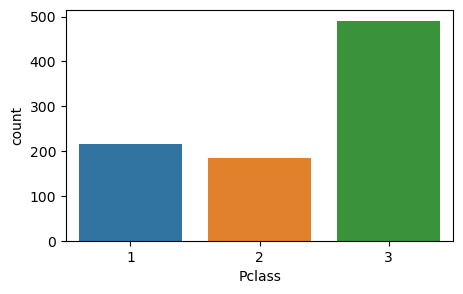

In [13]:
# Checking count of survival rate in the passenger class
plt.figure(figsize=[5,3])
print(data["Pclass"].value_counts())
sns.countplot(data["Pclass"])

From the above plot it can be seen that the passengers travelling in 3rd class are more and they did not survived. 1st class and 2nd class passengers are more likely to survive. Also there are only few passengers are travelling in the 1st class compare to the other two.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<Figure size 700x500 with 0 Axes>

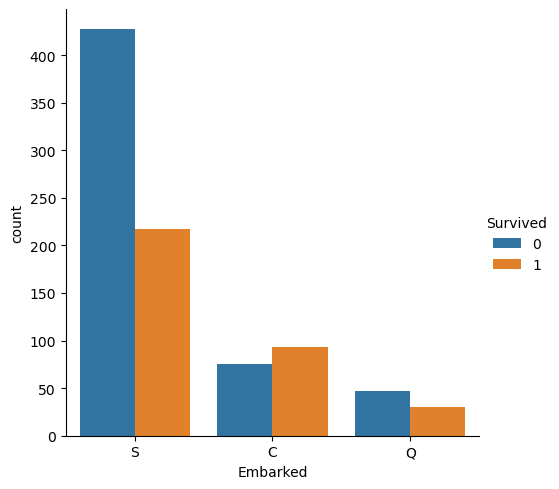

In [14]:
# Checking count in the Embarkation
plt.figure(figsize=[7,5])
print(data["Embarked"].value_counts())
sns.factorplot('Embarked',kind='count',data=data,hue='Survived')

Embarked has three counts S=Southampton, C=Cherbourg and Q=Queenstown from where the passengers were boarded. Majority of passengers boarded from "S"and "Q" has less passengers

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<Figure size 700x500 with 0 Axes>

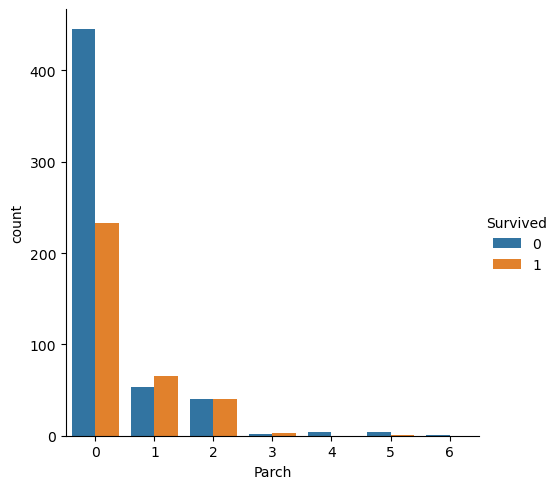

In [15]:
# Checking count in the Parch
plt.figure(figsize=[7,5])
print(data["Parch"].value_counts())
sns.factorplot('Parch',kind='count',data=data,hue='Survived')

From the above plot it can be seen that most of the passengers travelled alone which is named as 0 in the plot. We can say almost 80% of the passengers are alone, 15% of the passengers travelled either with their children or parents and remaining 5% of them travelled with group.

<AxesSubplot:title={'center':'Comparision between Pclass and Age'}, xlabel='Pclass', ylabel='Age'>

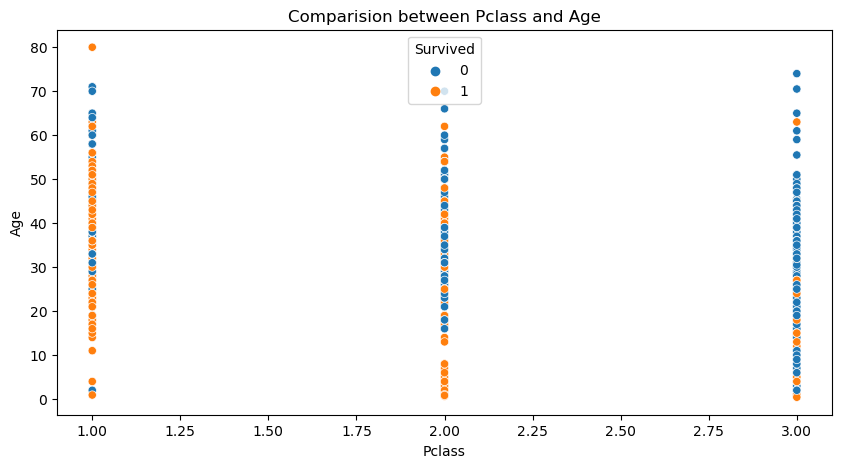

In [16]:
# Checking the relation between two variables
plt.figure(figsize=[10,5])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(data['Pclass'],data['Age'],hue=data["Survived"])

From the above plot following statements are made

1)Orange dots- All the passengers who are dead
  Blue dots- All the passengers who are survived

2)The passengers travelled in the 1stclass who were aged 5 to 25 and 40 to   55 are survived

3) Most of the passengers who travelled in the 2ndclass whose age between     15 to 60 were dead and only few passengers survived.

4)Most of the passengers of all the age, who travelled in the 3rd class are   dead compared to the other two classes.

<AxesSubplot:title={'center':'Comparision between Pclass and Sex'}, xlabel='Pclass', ylabel='Sex'>

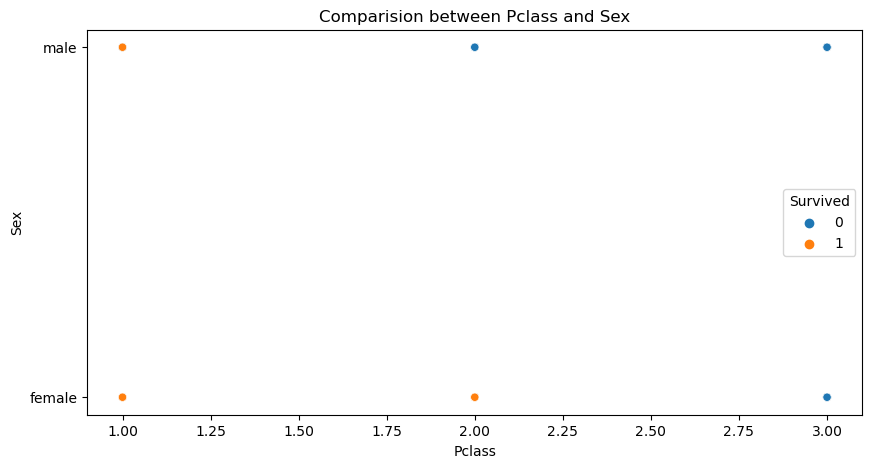

In [17]:
plt.figure(figsize=[10,5])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(data['Pclass'],data['Sex'],hue=data["Survived"])

From the above plot following statements are made

1)The male and female passengers from 1stclass survived.

2)Only the female passengers survived from 2ndClass.

3)The male and female passengers did not survive from 3rd class

<AxesSubplot:title={'center':'Comparision between Age and Embarked'}, xlabel='Embarked', ylabel='Age'>

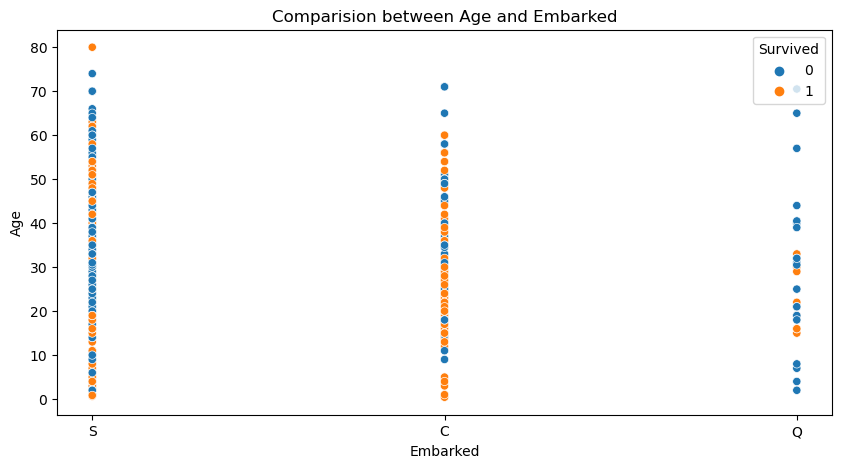

In [18]:
# Checking the relation between two variables
plt.figure(figsize=[10,5])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(data['Embarked'],data['Age'],hue=data["Survived"])

From the above plot following statements are made

1)The passengers who embarked for Southampton(S) (age between 20 to 40) are dead.

2)Most of the passengers who embarked for Cherbourg(C) were survived compared to S and Q

3)Only few passengers survived who embarked for Queenstown(Q)

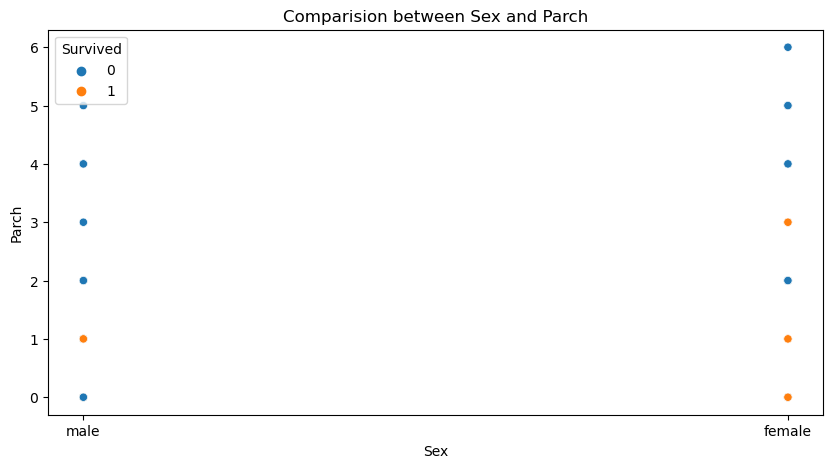

In [19]:
# Checking the relation between two variables
plt.figure(figsize=[10,5])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(data['Sex'],data['Parch'],hue=data["Survived"]);

From the above plot following statements are made

1)There are only few passengers survived both male and female.


<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

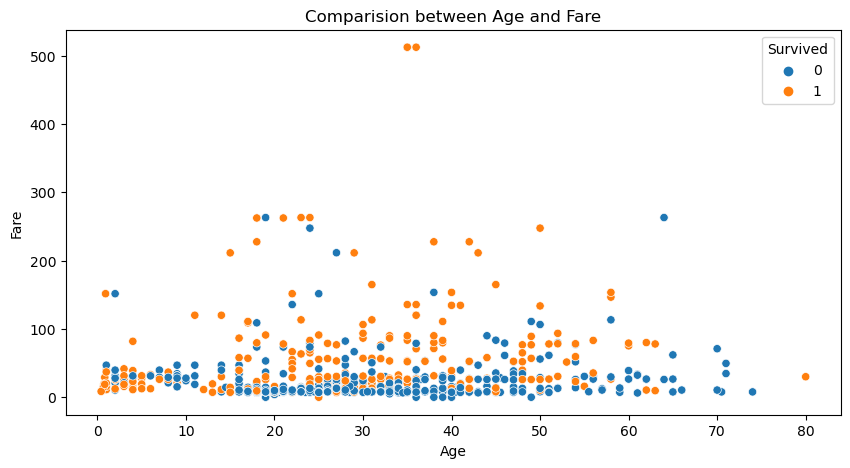

In [20]:
# Checking the relation between two variables
plt.figure(figsize=[10,5])
plt.title('Comparision between Age and Fare')
sns.scatterplot(data['Age'],data['Fare'],hue=data["Survived"])

From the above plot following statements are made

1)Here the children(0-8 yrs) who paid less Fare have the high survival chance.

2)Passengers whose age is between 20 to 50 and paid more Fare their survival chance being increase. to S and Q

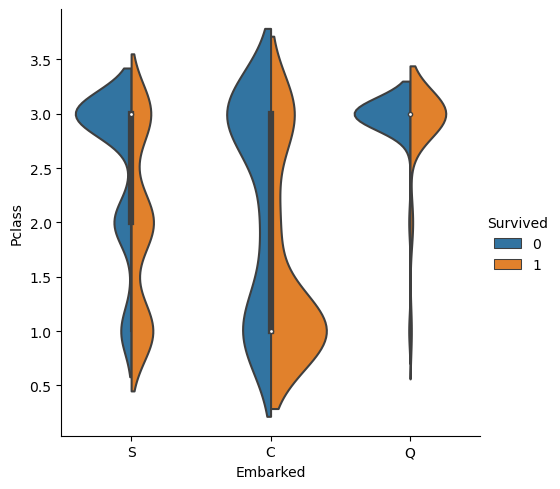

In [21]:
#plotting catplot for Embarked and Pclass
sns.catplot(x = "Embarked", y = "Pclass", hue = "Survived", kind = "violin", data=data, split=True)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

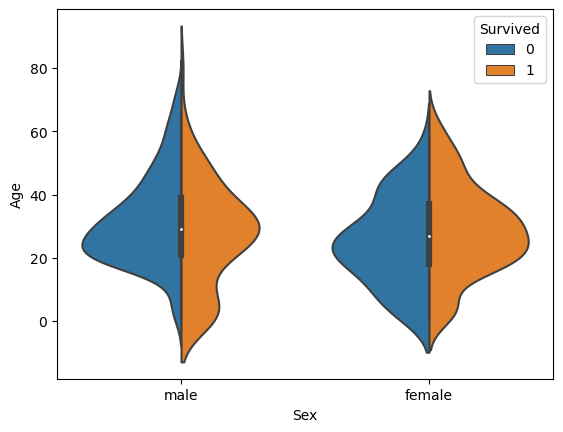

In [22]:
#plotting violinplot for Age and Sex
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True)

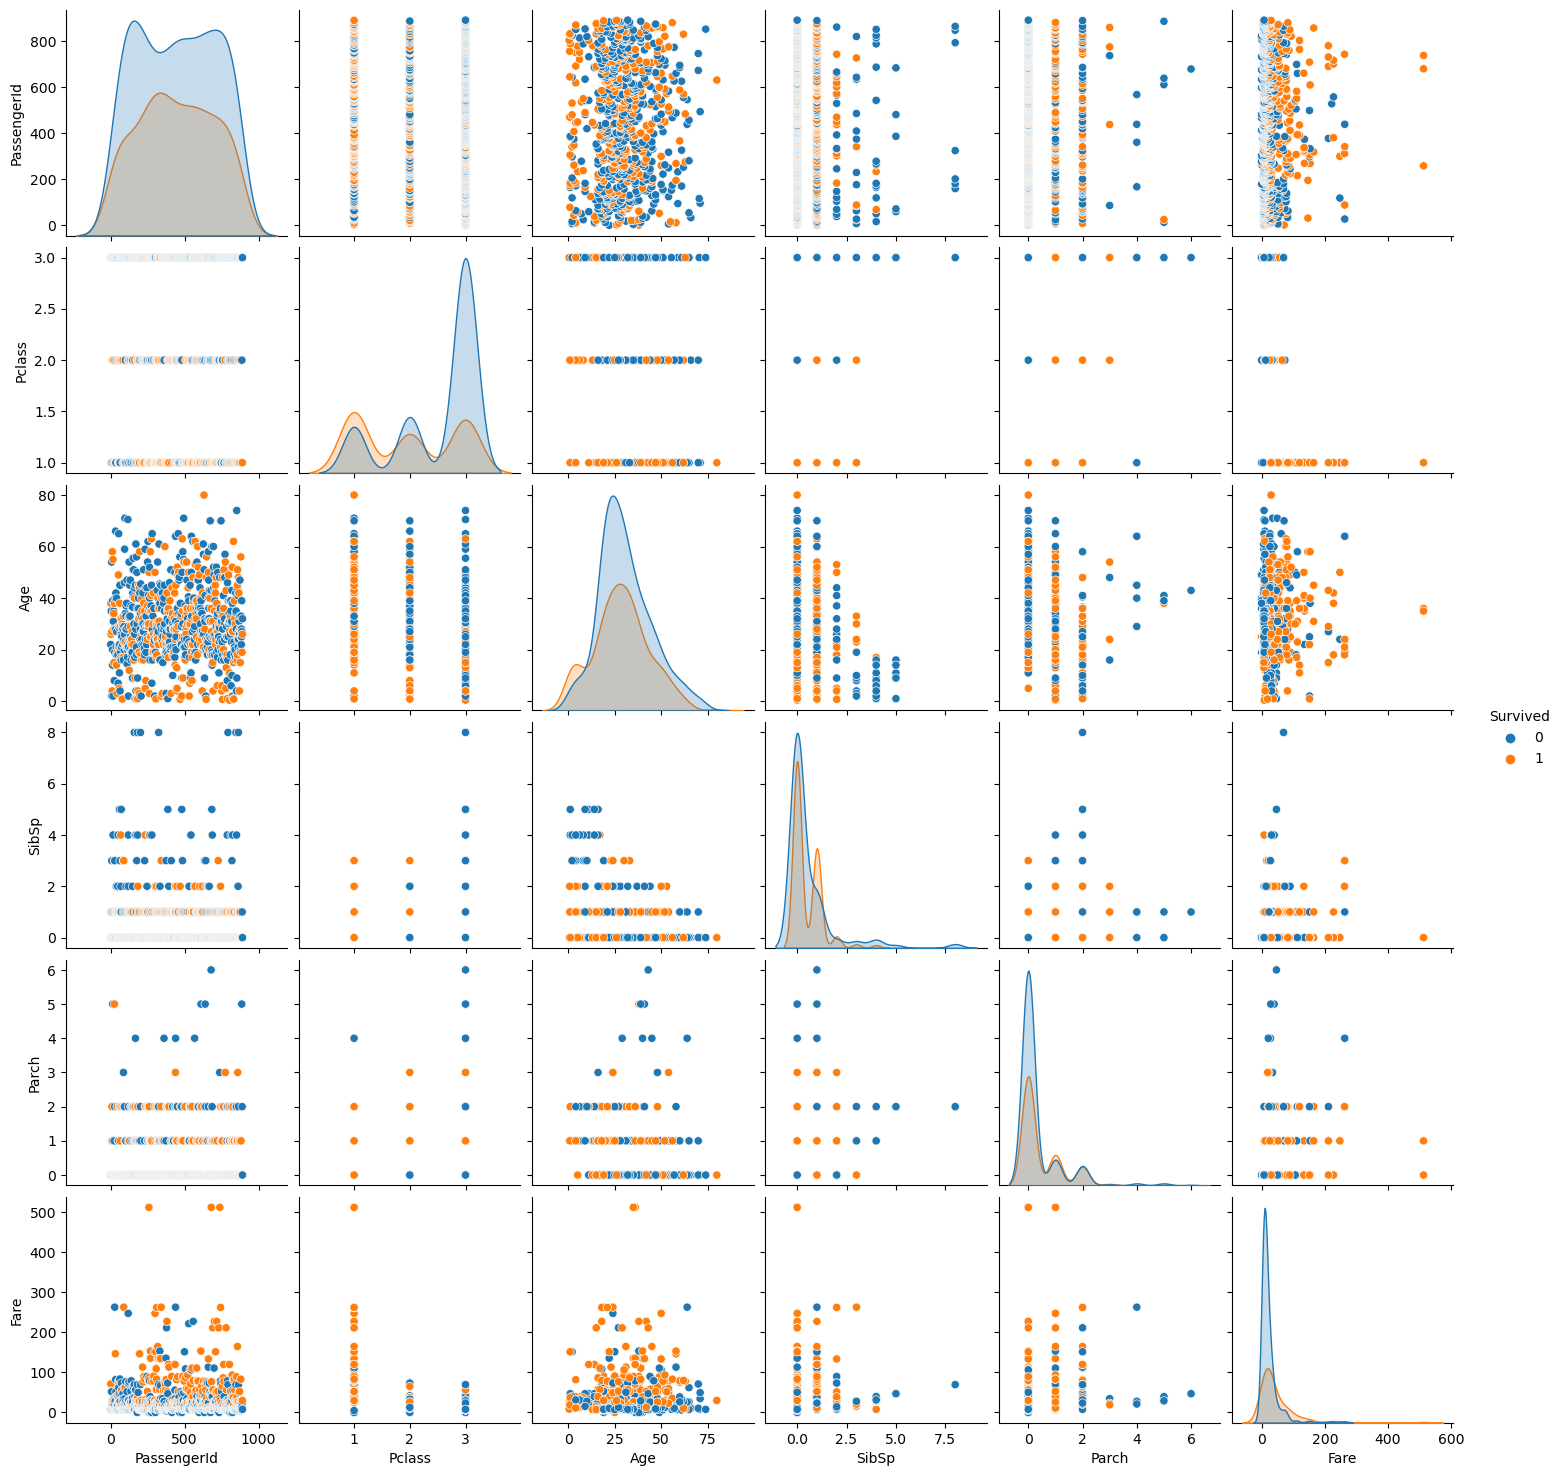

In [23]:
# Checking the pairwise relation in the dataset.
sns.pairplot(data,hue="Survived")

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. We can see the features Age and PassengerId are highly correlated but PassengerId has no more importance in our dataset so I am going to ignore it.

# Correlation between the target variable and independent variables using HEAT map

In [24]:
corr = data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


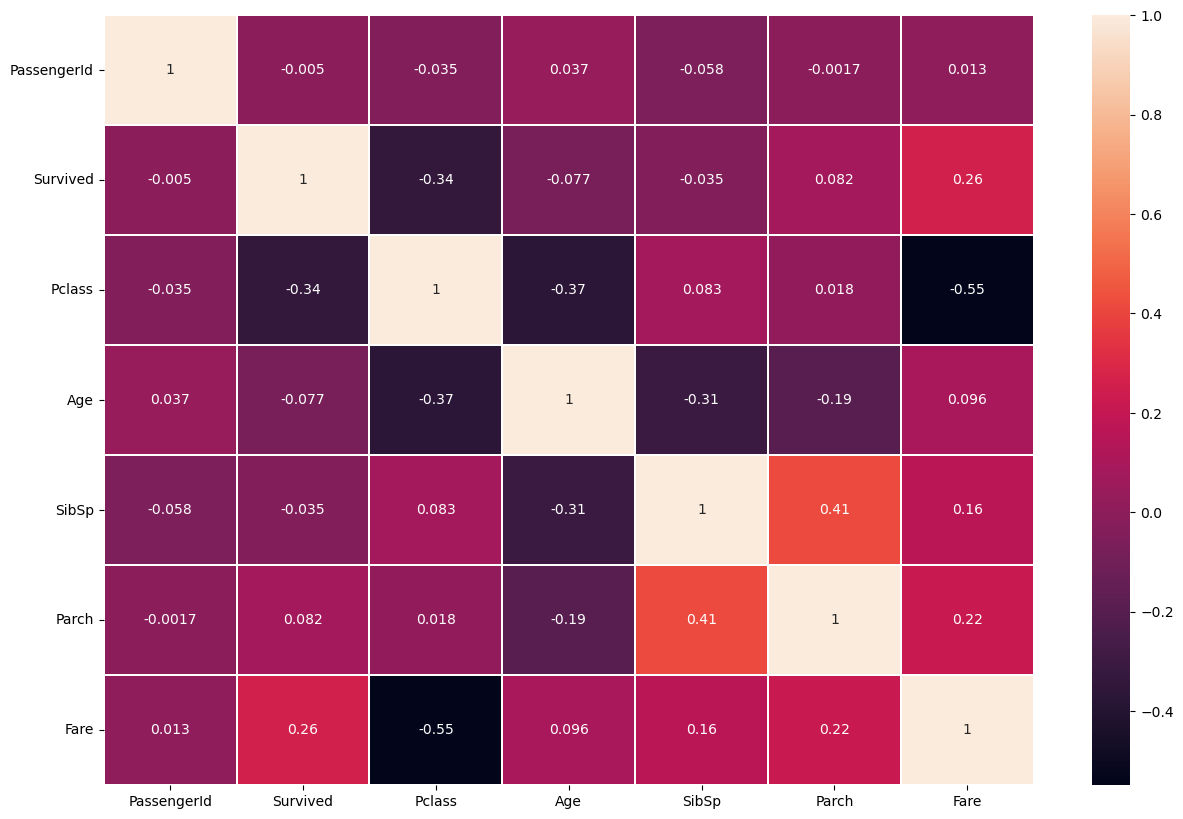

In [25]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

From the above heatmap following statements are made

1)The feature column Parch and Fare are positively correlated with the target variable "Survived".Pclass is highly negatively correlated with the target variable "Survived" 

2)Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. 

3) Light shades- highly correlated, Dark shades - less correlated

Text(0.5, 1.0, 'correlation with target variable')

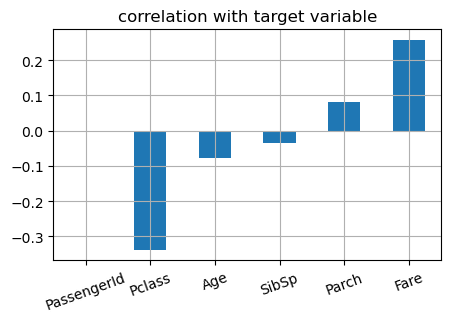

In [26]:
plt.figure(figsize=(5,3))
data.drop('Survived',axis=1).corrwith(data['Survived']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

In [27]:
# Dropping PassengerId column
data.drop('PassengerId', axis=1, inplace = True )
data.drop('Name',axis=1, inplace=True)

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# Checking the outliers

Survived       AxesSubplot(0.125,0.712609;0.168478x0.167391)
Pclass      AxesSubplot(0.327174,0.712609;0.168478x0.167391)
Age         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
SibSp       AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Parch          AxesSubplot(0.125,0.511739;0.168478x0.167391)
Fare        AxesSubplot(0.327174,0.511739;0.168478x0.167391)
dtype: object

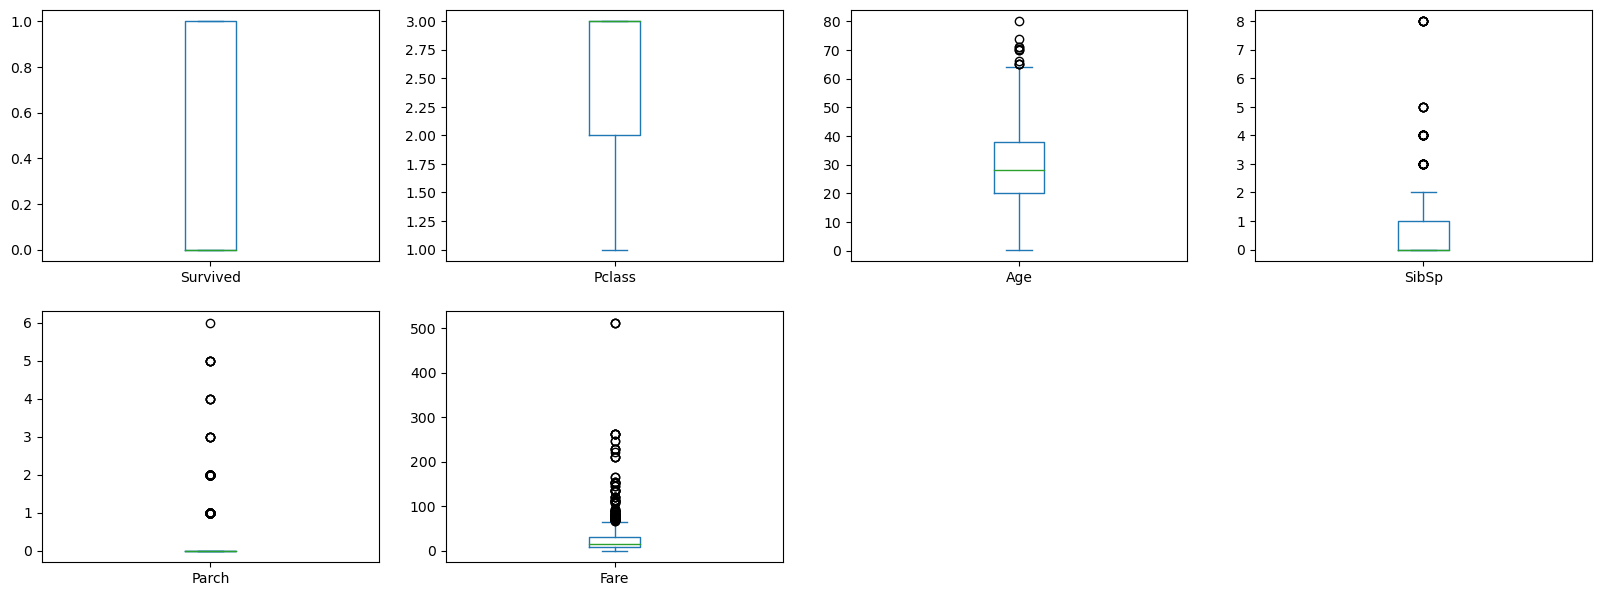

In [29]:
data.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,15))

The outliers are present in Age, Fare, SibSp and Parch.

In [30]:
#missing value
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [31]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
data['Cabin'] = data['Cabin'].fillna('U')

In [32]:
#Cheking null values after filling them
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:>

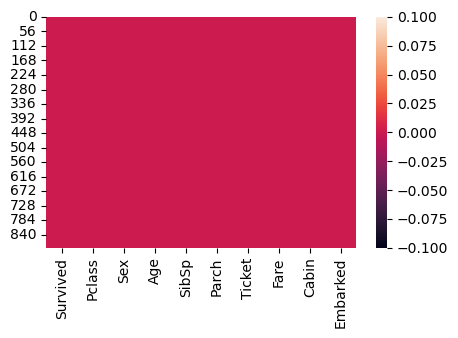

In [33]:
# Visualizing the missing value using heat map.
plt.figure(figsize=(5,3))
sns.heatmap(data.isnull())

# Removing Outliers

In [34]:
# Continuous features having outliers 
variables = data[['Age','Fare']]

In [35]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))
# Creating new dataframe
new = data[(z<3).all(axis=1)]
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


In [36]:
print(data.shape)
print(new.shape)

(891, 10)
(864, 10)


In [37]:
#Percent Data loss
data_loss = (891-864)/891*100
data_loss

3.0303030303030303

# Checking skewness

In [38]:
new.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

The features Pclass, SibSp, Parch and Fare has skewness.Skewness can be removed in Age, SibSp, Parch and Fare which contains numerical data

In [39]:
skewed_features = ["SibSp","Parch","Fare"]

In [40]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [41]:
new[skewed_features] = scaler.fit_transform(new[skewed_features].values)
new[skewed_features].head()

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493


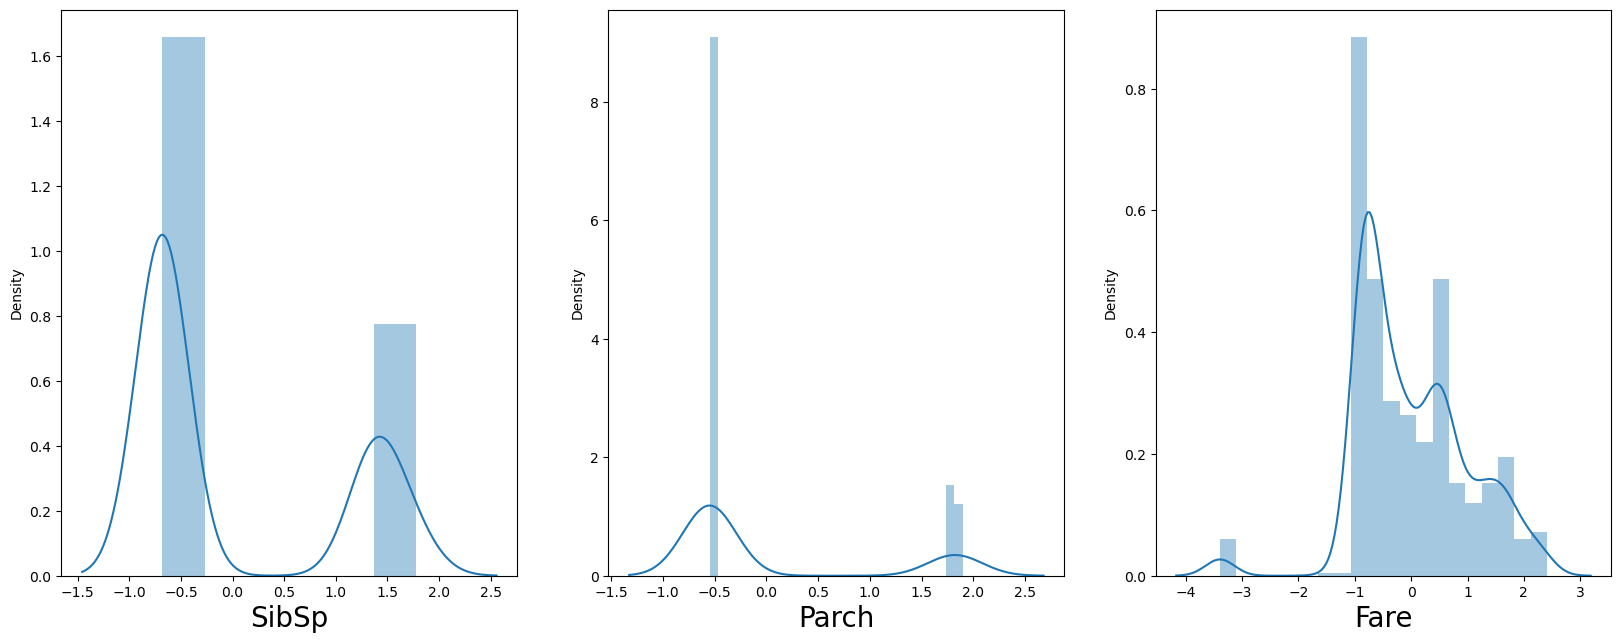

In [42]:
#checking how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [43]:
new.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
dtype: float64

In [44]:
#Encoding the data using Label Encoding
colmn = ["Sex", "Ticket", "Cabin", "Embarked"]

In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new[colmn]= new[colmn].apply(LE.fit_transform)

In [46]:
new[colmn].head()

,Sex,Ticket,Cabin,Embarked
0,1,517,135,2
1,0,587,70,0
2,0,655,135,2
3,0,48,48,2
4,1,466,135,2


In [47]:
# Dataset after cleaning and encoding
new

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,1,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,0,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,-0.680931,-0.548637,99,-0.279691,135,2
887,1,1,0,19.0,-0.680931,-0.548637,14,0.607981,26,2
888,0,3,0,28.0,1.374574,1.879004,661,0.345275,135,2
889,1,1,1,26.0,-0.680931,-0.548637,8,0.607981,53,0


# Splitting the variables into x and y

In [48]:
x = new.drop("Survived", axis=1)
y = new["Survived"]

In [49]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,-0.680931,-0.548637,99,-0.279691,135,2
887,1,0,19.0,-0.680931,-0.548637,14,0.607981,26,2
888,3,0,28.0,1.374574,1.879004,661,0.345275,135,2
889,1,1,26.0,-0.680931,-0.548637,8,0.607981,53,0


In [50]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

In [51]:
x.shape, y.shape

((864, 9), (864,))

# Model building and training

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8346153846153846  on Random_state  109


In [53]:
#Creating train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [54]:
x.shape, y.shape

((864, 9), (864,))

In [55]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((604, 9), (604,), (260, 9), (260,))

In [56]:
#Classification Algorithms
#importing libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [57]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.8269230769230769
[[134  29]
 [ 16  81]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       163
           1       0.74      0.84      0.78        97

    accuracy                           0.83       260
   macro avg       0.81      0.83      0.82       260
weighted avg       0.83      0.83      0.83       260



Accuracy is 84% using Decision Tree Classifier.

Confusion matrix which contains True-Positive, False-Positive rate and False-Negative, True -Negative rate.

In [58]:
#Random Forest Classifier
r = RandomForestClassifier()
r.fit(x_train,y_train)
predr = r.predict(x_test)

print(accuracy_score(y_test, predr))
print(confusion_matrix(y_test, predr))
print(classification_report(y_test,predr))

0.85
[[142  21]
 [ 18  79]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       163
           1       0.79      0.81      0.80        97

    accuracy                           0.85       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.85      0.85      0.85       260



Accuracy is 86% using Random Forest Classifier.

In [59]:
#Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.6461538461538462
[[140  23]
 [ 69  28]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       163
           1       0.55      0.29      0.38        97

    accuracy                           0.65       260
   macro avg       0.61      0.57      0.57       260
weighted avg       0.62      0.65      0.61       260



Accuracy is 83% using Support Vector Machine Classifier.

In [60]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7807692307692308
[[133  30]
 [ 27  70]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       163
           1       0.70      0.72      0.71        97

    accuracy                           0.78       260
   macro avg       0.77      0.77      0.77       260
weighted avg       0.78      0.78      0.78       260



Accuracy is 79% using Logistic Regression.

In [61]:
#KNN Classifier
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.6653846153846154
[[134  29]
 [ 58  39]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       163
           1       0.57      0.40      0.47        97

    accuracy                           0.67       260
   macro avg       0.64      0.61      0.61       260
weighted avg       0.65      0.67      0.65       260



Accuracy is 82% using KNN Classifier.

In [62]:
#Gradient Boosting Classifier
g = GradientBoostingClassifier()
g.fit(x_train,y_train)
predg = g.predict(x_test)

print(accuracy_score(y_test, predg))
print(confusion_matrix(y_test, predg))
print(classification_report(y_test,predg))

0.8346153846153846
[[137  26]
 [ 17  80]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       163
           1       0.75      0.82      0.79        97

    accuracy                           0.83       260
   macro avg       0.82      0.83      0.83       260
weighted avg       0.84      0.83      0.84       260



Accuracy is 85% using Gradient Boosting Classifier.

In [63]:
#Checking the Cross Validation Score
from sklearn.model_selection import cross_val_score

In [64]:
# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print(cross_val_score(r,x,y,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())

# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(g,x,y,cv=5).mean())

0.7709033472240894
0.8414706277725502
0.6678316978088452
0.7824035488640948
0.6423645651297217
0.8299166554644442


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

# Hyper parameter tuning for best model

In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Random Forest Classifier
parameters = {'n_estimators':[0,200],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [72]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Titanic_survived = RandomForestClassifier(criterion='entropy',max_depth=30, max_features='auto', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

# Plotting ROC-AUC curve for best model

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Saving the model

In [ ]:
ts_model = joblib.load('Titanic.obj')

# Conclusion

In [ ]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Titanic_survived.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new